#Data Analysis, Visualization and Processing

####The command below is to shift the interpreting environment to own personal Google Drive, please change to the correct path before you run the command.

In [4]:
%cd /content/drive/MyDrive/Colab Notebooks/ITP_MA3_ProcessMonitoring

/content/drive/MyDrive/Colab Notebooks/ITP_MA3_ProcessMonitoring


In [ ]:
from itpma3_utils import *

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###This is MA3 data analysis, visualization and preprocessing script, all the auxiliary classes and functions can be found in package `itpma3_utils`

load the dataset and attributes.

In [ ]:
data = load_data()
attribute = data.columns.tolist()[1:]
data

NameError: ignored

Check the missing values. If the output `data[index]` is `None`, the `index` are all `False`, which means there is no missing value in the dataset.

In [ ]:
# check missing value
check = data[data.isnull().T.any()]
if len(check) == 0: print('No missing values')
else: print("Missing values exist")

NameError: ignored

Calculate Pearson and Spearman correlation coefficient. <p>
The first step is to analyse the relationship between the target and all features. The values will be stored in two dictionaries.

In [ ]:
# correlation - Pearson/Spearman coefficient
pearson, spearman = dict(), dict()
target = data['target']
target.shape

(4733,)

In [ ]:
# calculate and store correlation coefficients
for att in attribute:
    pearson[att] = data[att].corr(target, method='pearson')
    spearman[att] = data[att].corr(target, method='spearman')
pearson, spearman

({'cube ID': -0.16824554392708801,
  'X': 0.0019993615285857813,
  'Y': 0.26252282483007633,
  'Z': 0.4094802129296142,
  'border_label': -0.05646676808235896,
  'sintering_duration_sum': 0.01691189515528274,
  'sintering_duration_sum.1': 0.016911895155282925,
  'senor1_mean': 0.046552150704928595,
  'senor2_mean': -0.03511347341314336,
  'senor3_mean': 0.04566465406955128,
  'sensor1_var': 0.02543854886504324,
  'sensor2_var': 0.03082825988896309,
  'sensor3_var': 0.06965162344815125,
  'sensor1_skew': -0.05416917998296275,
  'sensor2_skew': -0.047456530016482264,
  'sensor3_skew': -0.04476358824494372,
  'mean_scanspeed': -0.021236706497255793,
  'mean_hacthspacing': -0.09341096015527131,
  'mean_energydensity': 0.08594670581775368,
  'var_scanspeed': 0.00014033426705138295,
  'var_hatchspacing': 0.051581841493217026,
  'var_energydensity': 0.03868790714340436},
 {'cube ID': -0.17633216023281909,
  'X': 0.005115806648261471,
  'Y': 0.2732232492677447,
  'Z': 0.426877129716085,
  'bor

In our util package, the function `plot_correlation()` and `plot_heatmap()` can help with the visualization of global correlations. In $feature$ $heatmap$, the correlation method is Pearson.

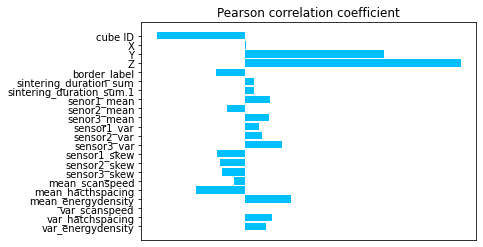

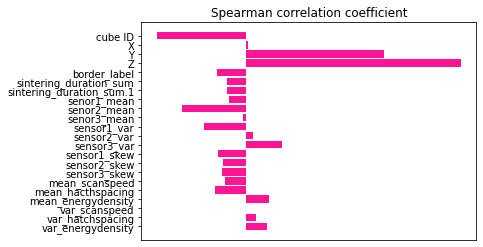

In [ ]:
# correlations visualization
plot_correlation(pearson, spearman)

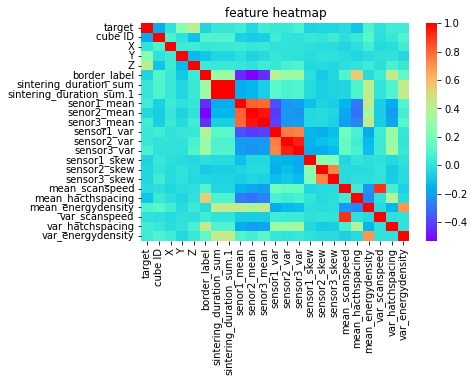

In [ ]:
# correlations visualization
plot_heatmap(data)

Based on the heatmap, it is obvious that the data obtained from three sensors can be highly similar, thus only one of them will be remained for the final training. Or there might be a better way to deal with them (compression, division etc.)

Dataset Normalizing. There are for ways of scaling the data: `StandardScaler`, `MinMaxScaler`, `Normalizer` and `MAbsScaler`.
But only first two of are recommended as they can effectively scale the data meanwhile do not largely affect the distribution of the data.

In [ ]:
scaler = DataScaler(method='std', split_target=True)
normed_data = scaler.fit(data)
print(scaler.available_methods)
print('normalized data shape: {}'.format(normed_data.shape))

dict_keys(['std', 'norm', 'minmax', 'mabs'])
normalized data shape: (4733, 23)


Principal Component Analysis, which is used for info capacity analysis and dimension reduction. The decision can be made based on the explained variance ratio (normalized eigenvalues).

In [ ]:
# principal component analysis
pca = PrincipalComponentAnalysisWrapper(n_components=normed_data.shape[-1] - 1)
pca.fit(normed_data[:, 1:])
print(pca.explained_variance_ratio)


[2.03787291e-01 1.32768816e-01 1.04786506e-01 8.32486711e-02
 7.26950591e-02 5.89460905e-02 5.14141165e-02 4.71233565e-02
 4.36744281e-02 3.83521599e-02 3.72398528e-02 3.42201790e-02
 2.51338054e-02 1.69169337e-02 1.24837104e-02 1.16711463e-02
 1.07187093e-02 8.64308804e-03 2.77982279e-03 2.42583413e-03
 9.70422770e-04 3.40107166e-35]


visualizations of explained variance ratio and dimension vs. data loss curve

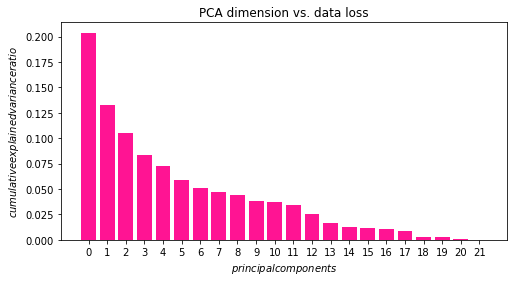

In [ ]:
# variance ratio bar chart
pca.visualize_variance_ratio()

This $PCA$ $dimension$ $vs.$ $data$ $loss$ curves is resulted from `StandardScaler`. Different results can be obrained from other data scaling methods. Go to the `DataScaler()` class and change the key `method` to `'norm', 'minmax', 'mabs'` if necessary.

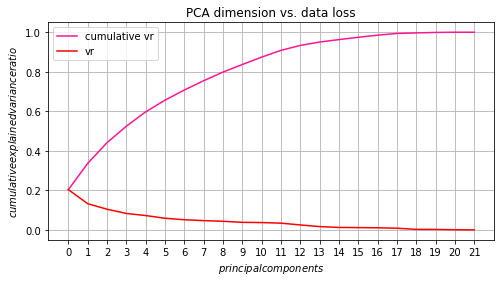

In [ ]:
pca.plot_data_loss()

###Feature Engineering will be started This Thursday! :D